In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

high_level_features = ('m_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb')                             #7 high level features
low_level_features = ('lepton_pT', 'lepton_eta', 'lepton_phi', 'missing_energy_magnitude', 'missing_energy_phi', #21 low level features
                    'jet_1_pt', 'jet_1_eta', 'jet_1_phi', 'jet_1_b-tag',
                    'jet_2_pt', 'jet_2_eta', 'jet_2_phi', 'jet_2_b-tag',
                    'jet_3_pt', 'jet_3_eta', 'jet_3_phi', 'jet_3_b-tag',
                    'jet_4_pt', 'jet_4_eta', 'jet_4_phi', 'jet_4_b-tag')

NUMBER_OF_LOW_LEVEL_FEATURES = len(low_level_features)

csv_file = "/content/drive/My Drive/Dataset/HIGGS_train.csv"
dataset = pd.read_csv(csv_file, low_memory = False, names = tuple(['class']) + low_level_features + high_level_features)

X = dataset.iloc[:, NUMBER_OF_LOW_LEVEL_FEATURES + 1:] #to use high level features
# X = dataset.iloc[:, :NUMBER_OF_LOW_LEVEL_FEATURES-1]

y = dataset.iloc[:, 0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   m_jj    600000 non-null  float64
 1   m_jjj   600000 non-null  float64
 2   m_lv    600000 non-null  float64
 3   m_jlv   600000 non-null  float64
 4   m_bb    600000 non-null  float64
 5   m_wbb   600000 non-null  float64
 6   m_wwbb  600000 non-null  float64
dtypes: float64(7)
memory usage: 32.0 MB


1.0    317572
0.0    282428
Name: class, dtype: int64

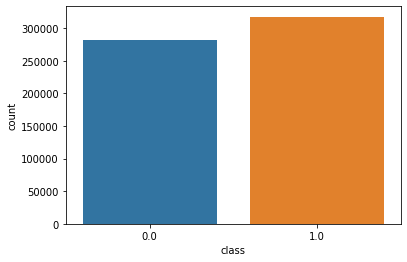

In [3]:
#Data analysis
X.info()

#check distribution of data
sns.countplot(data = dataset, x = 'class')
dataset['class'].value_counts()

In [4]:
#Encoding
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

for i in high_level_features:
    X[i]= label_encoder.fit_transform(X[i])

X.head()

,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,915,635,551,540,757,631,478
1,182,488,559,598,815,634,399
2,790,666,559,571,838,508,381
3,827,658,572,348,904,645,559
4,636,691,560,458,1048,514,409


In [5]:
#Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2) 
#TO-DO: EXPERIMENT WITH TEST/TRAINING SPLITS

In [6]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

In [10]:
#Testing vs Training accuracy 
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix

testing_accuracy = lr_model.score(X_test, y_test)
training_accuracy = lr_model.score(X_train, y_train)
print("testing accuracy: %.4f, training accuracy: %.4f" % (testing_accuracy, training_accuracy))

testing accuracy: 0.6168, training accuracy: 0.6154


              precision    recall  f1-score   support

         0.0       0.60      0.54      0.57     84289
         1.0       0.63      0.69      0.66     95711

    accuracy                           0.62    180000
   macro avg       0.61      0.61      0.61    180000
weighted avg       0.62      0.62      0.61    180000



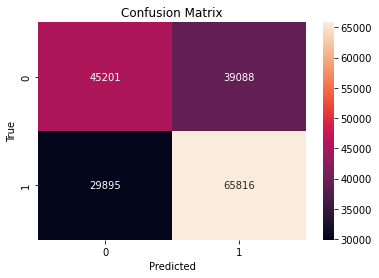

In [8]:
#Testing data: Classification report and Confusion matrix
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

print(classification_report(y_test, y_pred))